In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# A) Assemble a dataframe with one row per customer and the following columns:
    # customer_id
    # gender
    # most_recent_order_date
    # order_count (number of orders placed by this customer)

In [6]:
kds.head()

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.5,1
1,1001,0,2017-01-01 00:29:56,338.0,1
2,1002,1,2017-01-01 01:30:31,733.0,1
3,1003,1,2017-01-01 01:34:22,772.0,1
4,1004,0,2017-01-01 03:11:54,508.0,1


In [7]:
print(kds.head(5))

   customer_id  gender                 date  value  predicted_gender
0         1000       0  2017-01-01 00:11:31  198.5                 1
1         1001       0  2017-01-01 00:29:56  338.0                 1
2         1002       1  2017-01-01 01:30:31  733.0                 1
3         1003       1  2017-01-01 01:34:22  772.0                 1
4         1004       0  2017-01-01 03:11:54  508.0                 1


In [8]:
# Sort the dataframe by customer_id ascending and display the first 10 rows.
kds.sort_values(by='customer_id', ascending=True).head(10)

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.5,1
1,1001,0,2017-01-01 00:29:56,338.0,1
2,1002,1,2017-01-01 01:30:31,733.0,1
1742,1002,1,2017-02-19 21:35:31,176.0,1
928,1002,1,2017-01-23 04:33:38,148.6,1
3,1003,1,2017-01-01 01:34:22,772.0,1
676,1003,1,2017-01-20 05:56:10,425.5,1
4292,1003,1,2017-04-25 09:54:54,0.0,1
4323,1003,1,2017-04-26 02:37:20,704.0,1
4,1004,0,2017-01-01 03:11:54,508.0,1


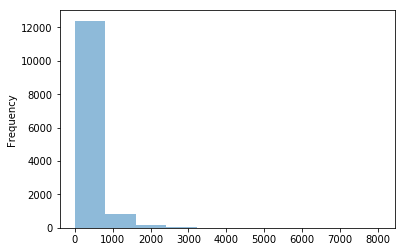

In [9]:
# B) Plot the count of orders per week.
kds['value'].plot.hist(alpha=0.5)

/Users/johnmorales/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


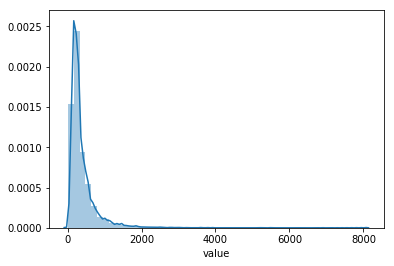

In [10]:
import seaborn as sns
sns.distplot(kds['value']) 

In [34]:
# C) Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant?
gender_zero = kds.loc[kds['gender'] == 0]
gender_one = kds.loc[kds['gender'] == 1]

In [27]:
gender_zero['value'].mean()

363.89000591803506

In [28]:
gender_one['value'].mean()

350.70836114422

In [29]:
gender_zero.shape

(6759, 5)

In [30]:
gender_one.shape

(6712, 5)

In [24]:
# The difference first appears to not be significant given that the number of customers for gender 0 is relatively similar
# to those for gender 1 (e.g. 6759 vs 6712). Additionally, the sample difference is 13.18.
# Alternative is to calculate the error between the predictions and the actual values using MSE
# in order to validate estimated error; the MSE formula (and t test) can be used for further analysis

AttributeError: module 'seaborn' has no attribute 'plt'

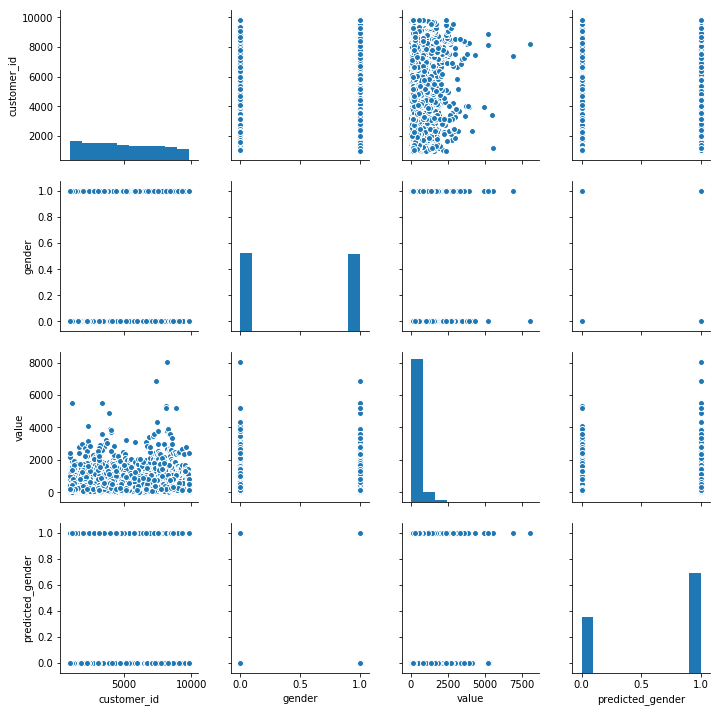

In [36]:
sns.pairplot(kds)
sns.plt.show()

In [13]:
# D) Assuming a single gender prediction was made for each customer, generate a confusion matrix for predicted gender.
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [14]:
actual = kds['gender']
predicted = kds['predicted_gender']
results = confusion_matrix(actual, predicted)

In [16]:
# TP = 3349, FN = 3410, FP = 1463, TN = 5249
# More errors were made predicting gender 1 (e.g. 5249 vs. 1463)
# Using a diagonal line from top left to bottom-right, 3349 and 5249 are the correct values for both gender 0 and gender 1
print(results)

[[3349 3410]
 [1463 5249]]


In [78]:
# What does the confusion matrix tell you about the quality of the predictions?
print(accuracy_score(actual, predicted))

0.6382599658525722


In [20]:
# The accuracy score indicates that the classifier is often 63.83% correct in terms of correct predictions
# When the classifier predicts correctly (e.g. precision), it is 70% for gender 0 and 61% for gender 1
# The recall is 50% for gender 0 and 78% for gender 1; the model is much better for gender 1
# Given the large number of TN and an uneven distribution, the F-1 score shows the model is more useful for gender 1
print(classification_report(actual, predicted))

             precision    recall  f1-score   support

          0       0.70      0.50      0.58      6759
          1       0.61      0.78      0.68      6712

avg / total       0.65      0.64      0.63     13471



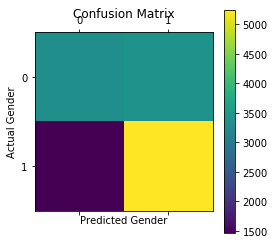

In [66]:
plt.matshow(results)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('Actual Gender')
plt.xlabel('Predicted Gender')
plt.show()